In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


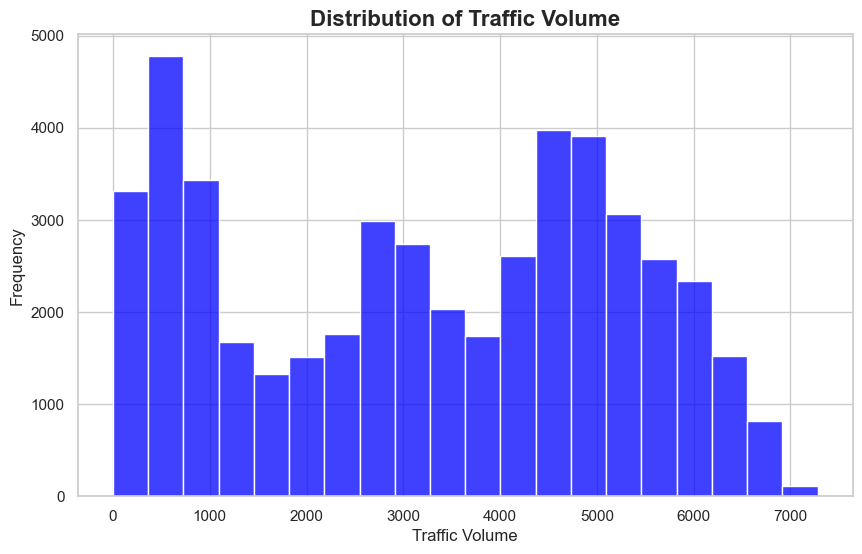

In [5]:
#Create histogram for distribution of traffic volume
import seaborn as sns
sns.set_theme()

# Set Seaborn style
sns.set(style='whitegrid')

#Plotting
plt.figure(figsize=(10,6))
sns.histplot(traffic['traffic_volume'], bins=20, color='blue')
plt.title('Distribution of Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
#Isloate daytime and nighttime data into two seperate dataframes
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
daytime = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
nighttime = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

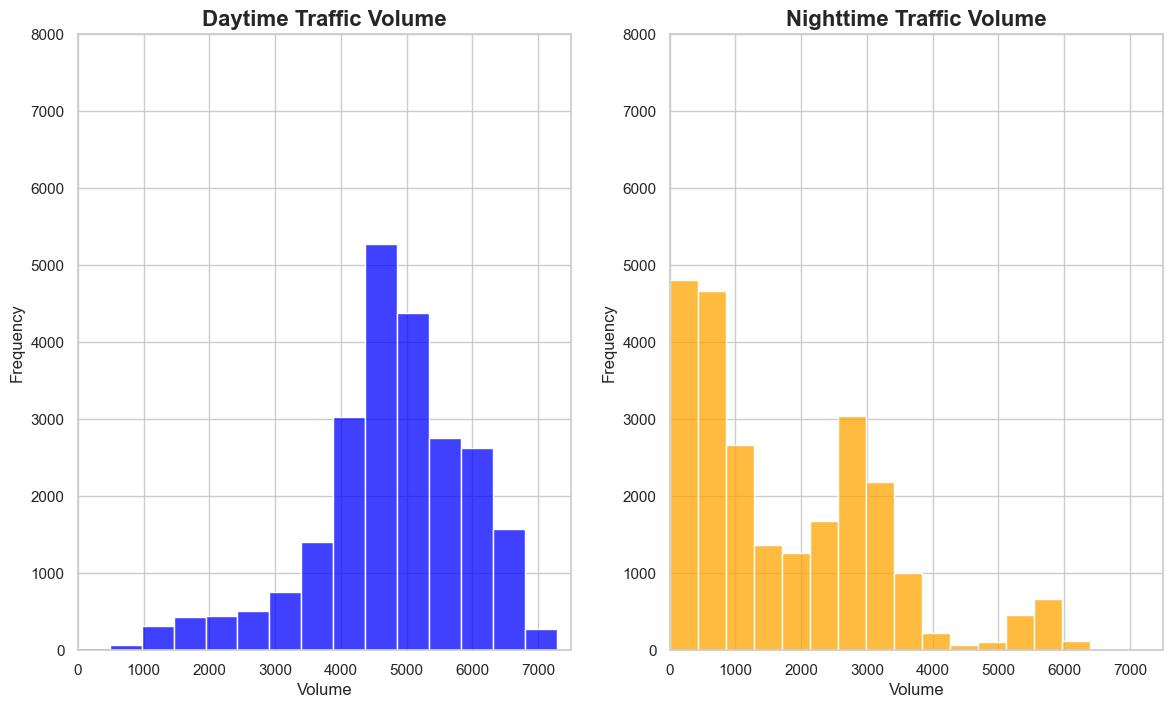

In [8]:
#Create the figure for two subplots
plt.figure(figsize=(14,8))

#Plot daytime traffic volume distribution
plt.subplot(1,2,1)
sns.histplot(daytime['traffic_volume'], bins=15, color='blue')
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Daytime Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Volume')
plt.ylabel('Frequency')

#Plot nighttime traffic volume distribution
plt.subplot(1,2,2)
sns.histplot(nighttime['traffic_volume'], bins=15, color='orange')
plt.xlim(0, 7500)
plt.ylim(0, 8000)
plt.title('Nighttime Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.show()

Traffic at night is relatively light. Because of this, we will focus only on the daytime data.

In [9]:
#Create a series of mean traffic volumes grouped by month
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime[['month', 'traffic_volume']].groupby('month').mean()
by_month

C:\Users\zacha\AppData\Local\Temp\ipykernel_30844\232630366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['month'] = daytime['date_time'].dt.month


,traffic_volume
month,
1,4495.613727
2,4711.198394
3,4889.409560
4,4906.894305
5,4911.121609
6,4898.019566
7,4595.035744
8,4928.302035
9,4870.783145


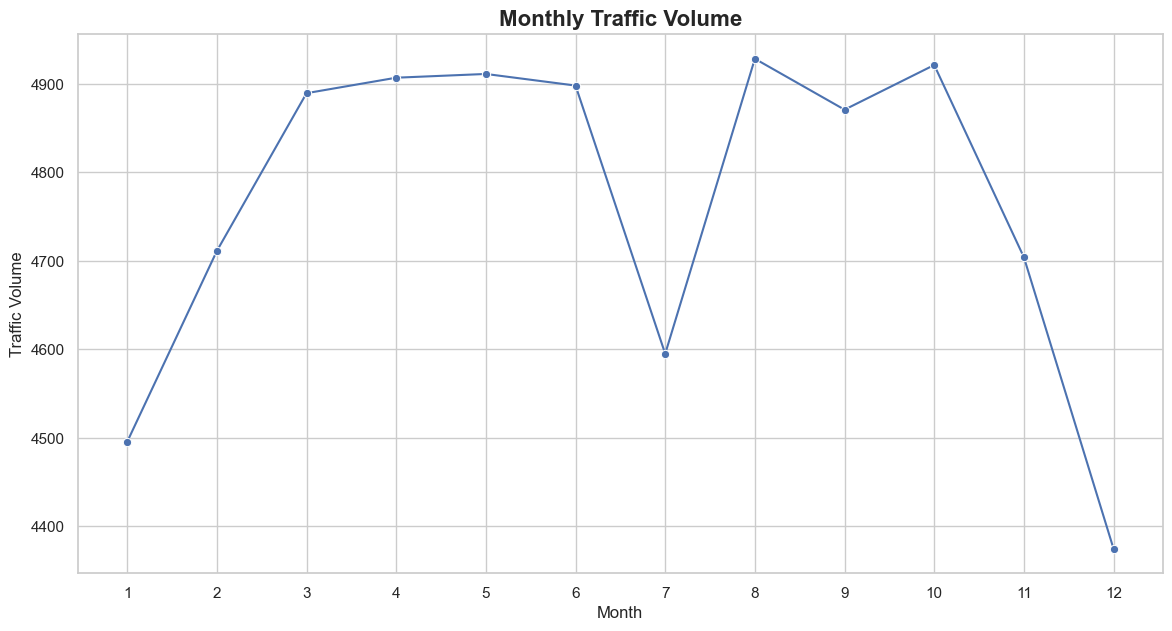

In [10]:
#Plot monthly traffic volume
plt.figure(figsize=(14,7))
sns.lineplot(by_month, marker='o', legend=False)
plt.xticks(range(1,len(by_month) +1))
plt.title('Monthly Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

In [11]:
#Create a series of mean traffic volumes grouped by day
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime[['dayofweek', 'traffic_volume']].groupby('dayofweek').mean()
by_dayofweek

C:\Users\zacha\AppData\Local\Temp\ipykernel_30844\1192943720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['dayofweek'] = daytime['date_time'].dt.dayofweek


,traffic_volume
dayofweek,
0,4893.551286
1,5189.004782
2,5284.454282
3,5311.303730
4,5291.600829
5,3927.249558
6,3436.541789


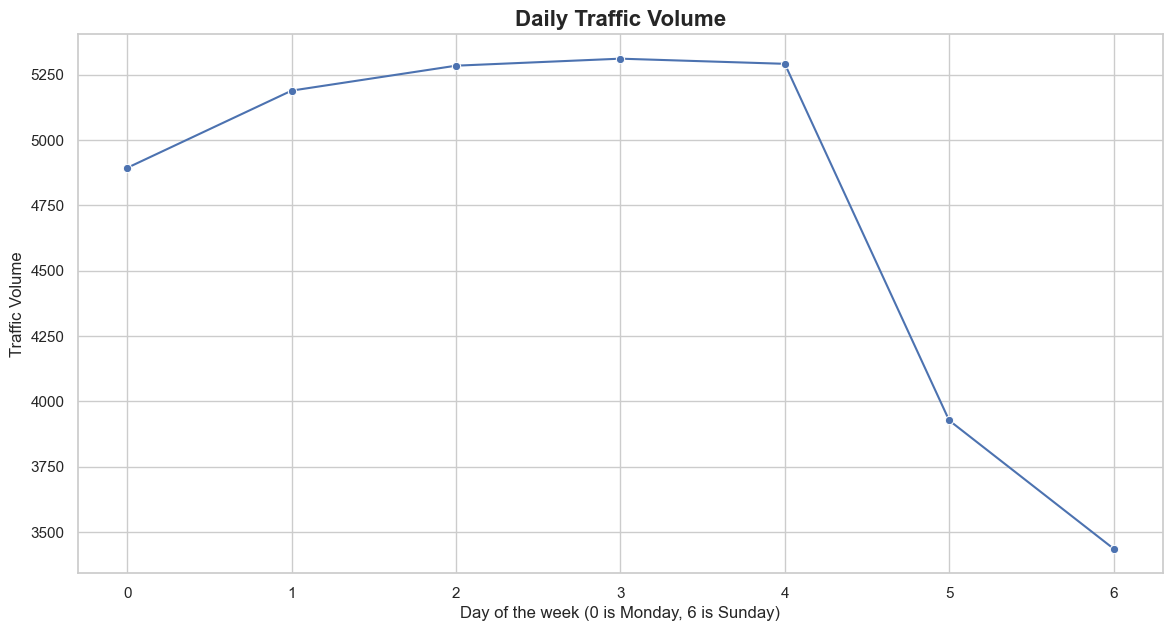

In [12]:
#Plot daily traffic volume
plt.figure(figsize=(14,7))
sns.lineplot(by_dayofweek, marker='o', legend=False)
plt.title('Daily Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Day of the week (0 is Monday, 6 is Sunday)')
plt.ylabel('Traffic Volume')
plt.show()

In [13]:
#Isolate bussiness days and weekends into two seperate dataframes
daytime['hour'] = daytime['date_time'].dt.hour
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4]
weekend = daytime.copy()[daytime['dayofweek'] >= 5]

#Create a series of mean traffic volumes grouped by buissiness day hours
by_hour_business = bussiness_days[['hour', 'traffic_volume']].groupby('hour').mean()

#Create a series of mean traffic volumes grouped by weekend hours
by_hour_weekend = weekend[['hour', 'traffic_volume']].groupby('hour').mean()

C:\Users\zacha\AppData\Local\Temp\ipykernel_30844\877123876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytime['hour'] = daytime['date_time'].dt.hour


In [14]:
by_hour_business

,traffic_volume
hour,
7,6030.413559
8,5503.497970
9,4895.269257
10,4378.419118
11,4633.419470
12,4855.382143
13,4859.180473
14,5152.995778
15,5592.897768


In [15]:
by_hour_weekend

,traffic_volume
hour,
7,1589.365894
8,2338.578073
9,3111.623917
10,3686.632302
11,4044.154955
12,4372.482883
13,4362.296564
14,4358.543796
15,4342.456881


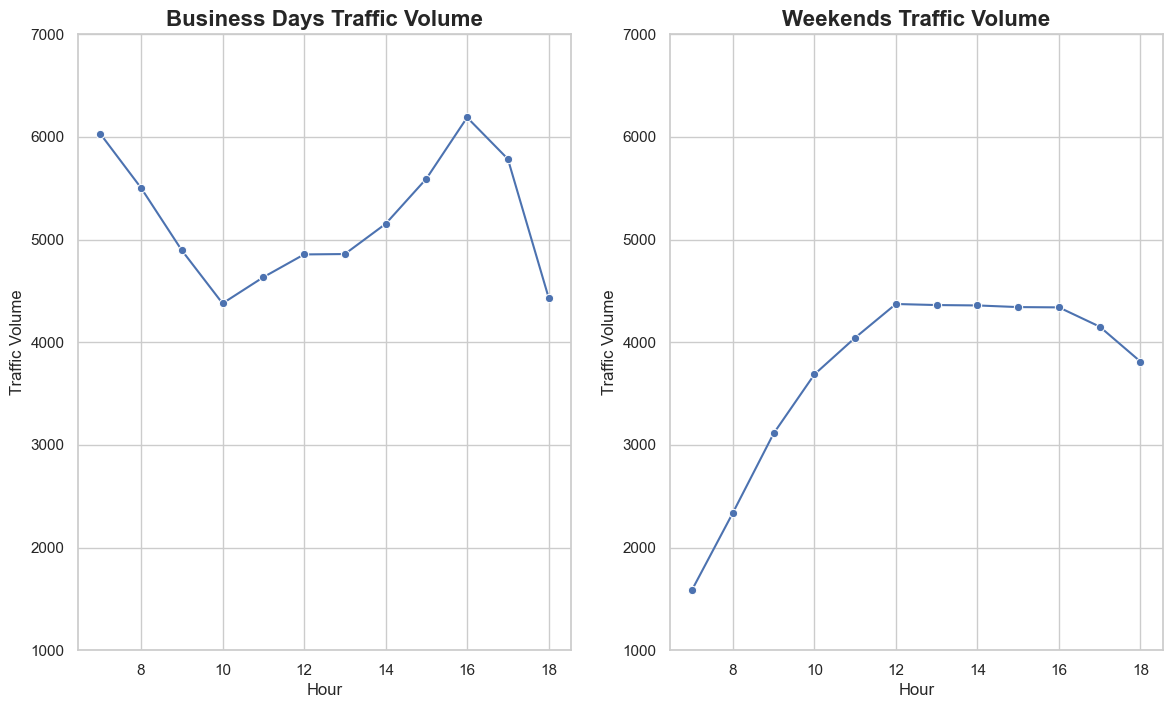

In [16]:
#Create the figure for the two subplots
plt.figure(figsize=(14,8))

#Plot business days traffic volume
plt.subplot(1,2,1)
sns.lineplot(by_hour_business, marker='o', legend=False)
plt.ylim(1000, 7000)
plt.title('Business Days Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.subplot(1,2,2)
sns.lineplot(by_hour_weekend, marker='o', legend=False)
plt.ylim(1000, 7000)
plt.title('Weekends Traffic Volume', fontsize=16, fontweight='bold')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.show()

In [17]:
#Create correlation table between traffic volume and numerical weather columns
daytime[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']].corr().head(n=1)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
traffic_volume,1.0,0.128317,0.003697,0.001265,-0.032932


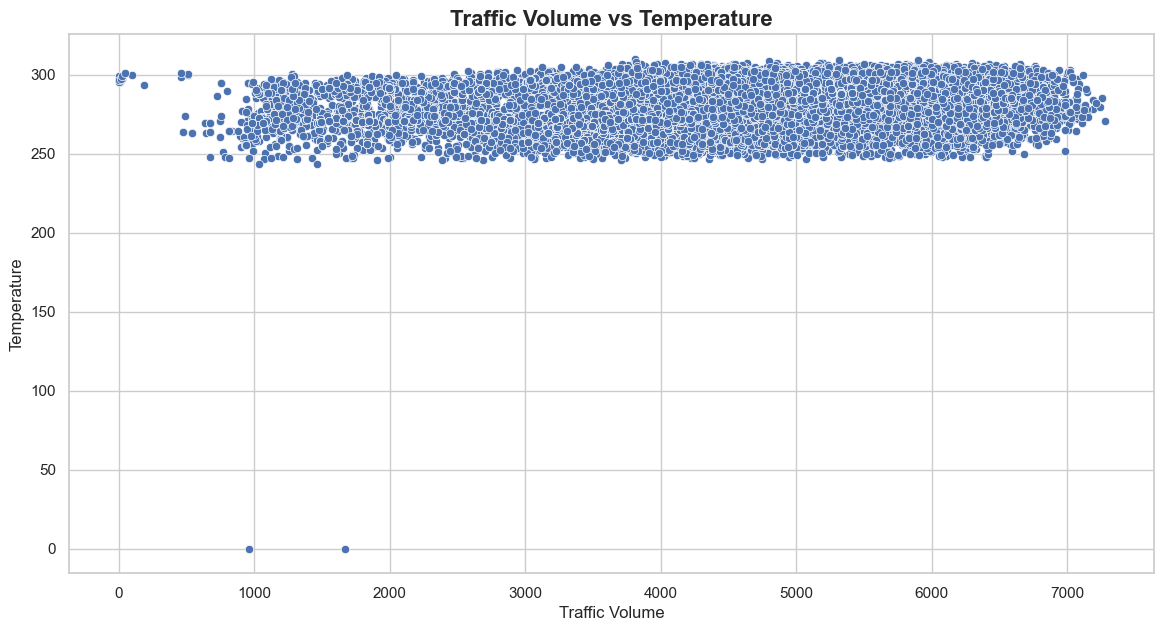

In [18]:
#Plot traffic volume vs temperature scatter plot
plt.figure(figsize=(14,7))
sns.scatterplot(x=daytime['traffic_volume'], y=daytime['temp'])
plt.title('Traffic Volume vs Temperature', fontsize=16, fontweight='bold')
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')
plt.show()

In [19]:
#Create a series of mean traffic volumes grouped by weather type
by_weather_main = daytime[['traffic_volume', 'weather_main']].groupby('weather_main').mean()

#Create a series of mean traffic volumes grouped by weather description
by_weather_description = daytime[['traffic_volume', 'weather_description']].groupby('weather_description').mean()

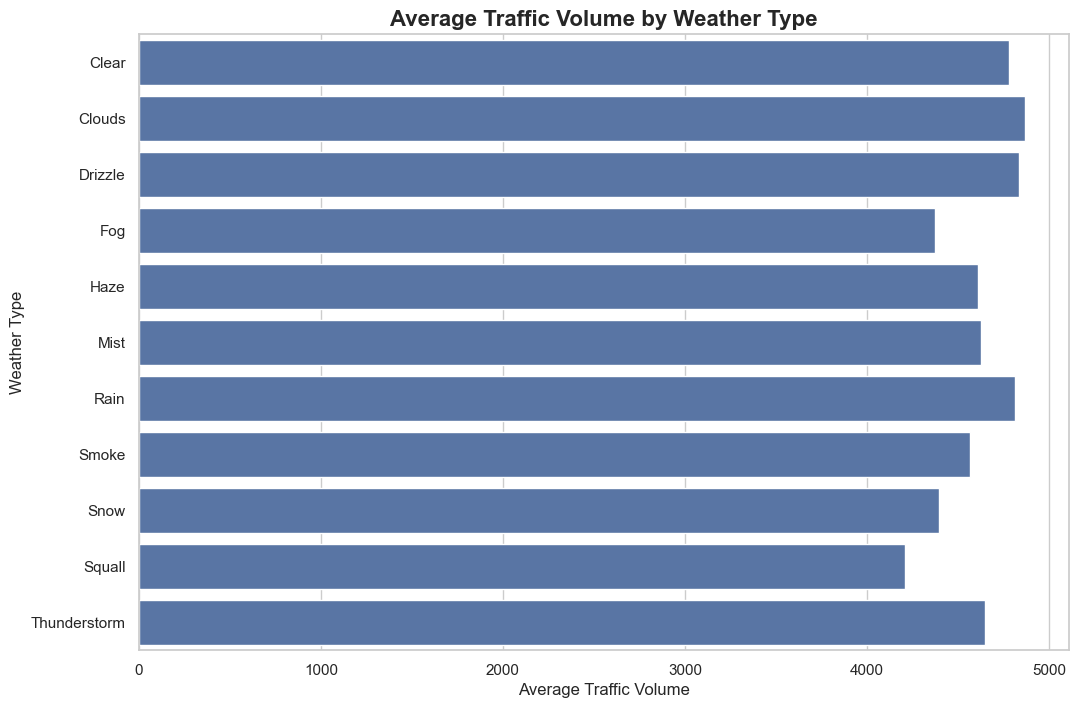

In [20]:
#Create horizontal bar graph of average traffic volume by weather type
plt.figure(figsize=(12,8))
sns.barplot(x=by_weather_main['traffic_volume'], y=by_weather_main.index)
plt.title('Average Traffic Volume by Weather Type', fontsize=16, fontweight='bold')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Type')
plt.show()

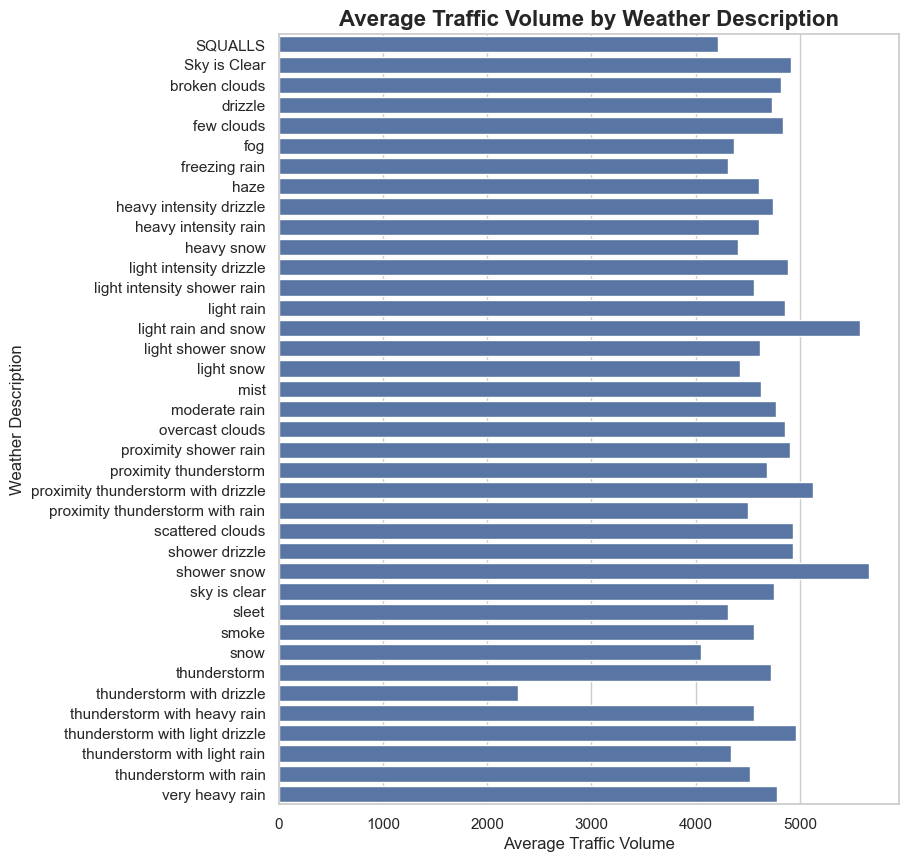

In [21]:
#Create horizontal bar graph of average traffic volume by weather description
plt.figure(figsize=(8,10))
sns.barplot(x=by_weather_description['traffic_volume'], y=by_weather_description.index)
plt.title('Average Traffic Volume by Weather Description', fontsize=16, fontweight='bold')
plt.xlabel('Average Traffic Volume')
plt.ylabel('Weather Description')
plt.show()